In [169]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [170]:
df = pd.read_csv("D:\\Resume_and_finshed_projects\\Obesity\\Nutrition__Physical_Activity__and_Obesity_-_Behavioral_Risk_Factor_Surveillance_System.csv") 
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


EDA and Data Cleaning

In [171]:
#checking null data
df['Data_Value'].isnull().sum() 

df = df.dropna(subset= ['Data_Value'])
print(df['Sample_Size'].isnull().sum())

0


In [172]:
print('Datasources,', df['Datasource'].unique()) 
print('Classes', df['Class'].unique()) 
print('Questions ', df['Question'].nunique(), df['Question'].unique()) 
print('# of Locations ', df['LocationAbbr'].nunique())  
print('Topiic', df['Topic'].unique()) 
print("                            ")
print(df.dtypes)


Datasources, ['Behavioral Risk Factor Surveillance System']
Classes ['Obesity / Weight Status' 'Fruits and Vegetables' 'Physical Activity']
Questions  9 ['Percent of adults aged 18 years and older who have obesity'
 'Percent of adults aged 18 years and older who have an overweight classification'
 'Percent of adults who report consuming fruit less than one time daily'
 'Percent of adults who report consuming vegetables less than one time daily'
 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'
 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week'
 'Percent 

In [173]:
df_subset = df[['YearStart','LocationAbbr','Class','Question','Data_Value','Age(years)','Education','Gender','Income','Race/Ethnicity','Sample_Size','Total','LocationID']] 
df_subset_no_totals = df_subset[df_subset['Total'] != 'Total']  
df_subset.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 48346 entries, 0 to 53386
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YearStart       48346 non-null  int64  
 1   LocationAbbr    48346 non-null  object 
 2   Class           48346 non-null  object 
 3   Question        48346 non-null  object 
 4   Data_Value      48346 non-null  float64
 5   Age(years)      11438 non-null  object 
 6   Education       7628 non-null   object 
 7   Gender          3814 non-null   object 
 8   Income          13349 non-null  object 
 9   Race/Ethnicity  10210 non-null  object 
 10  Sample_Size     48346 non-null  float64
 11  Total           1907 non-null   object 
 12  LocationID      48346 non-null  int64  
dtypes: float64(2), int64(2), object(9)
memory usage: 5.2+ MB


In [174]:
df_subset.head()

,YearStart,LocationAbbr,Class,Question,Data_Value,Age(years),Education,Gender,Income,Race/Ethnicity,Sample_Size,Total,LocationID
0,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.0,NaN,NaN,NaN,NaN,NaN,7304.0,Total,1
1,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,NaN,NaN,Male,NaN,NaN,2581.0,NaN,1
2,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,NaN,NaN,Female,NaN,NaN,4723.0,NaN,1
3,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,NaN,Less than high school,NaN,NaN,NaN,1153.0,NaN,1
4,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,NaN,High school graduate,NaN,NaN,NaN,2402.0,NaN,1


In [175]:
df_subset.duplicated().sum()

0

In [176]:
#Removing Outliers

def remove_outliers(df, column_name):

    
    # Calculate Q1, Q2 and IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    df_out = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    
    return df_out 
remove_outliers(df_subset,'Sample_Size')


,YearStart,LocationAbbr,Class,Question,Data_Value,Age(years),Education,Gender,Income,Race/Ethnicity,Sample_Size,Total,LocationID
1,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.3,NaN,NaN,Male,NaN,NaN,2581.0,NaN,1
2,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,31.8,NaN,NaN,Female,NaN,NaN,4723.0,NaN,1
3,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.6,NaN,Less than high school,NaN,NaN,NaN,1153.0,NaN,1
4,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,32.8,NaN,High school graduate,NaN,NaN,NaN,2402.0,NaN,1
5,2011,AL,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,33.8,NaN,Some college or technical school,NaN,NaN,NaN,1925.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53382,2016,VI,Physical Activity,Percent of adults who engage in no leisure-tim...,13.3,NaN,NaN,NaN,"$75,000 or greater",NaN,212.0,NaN,78
53383,2016,VI,Physical Activity,Percent of adults who engage in no leisure-tim...,25.3,NaN,NaN,NaN,Data not reported,NaN,137.0,NaN,78
53384,2016,VI,Physical Activity,Percent of adults who engage in no leisure-tim...,18.3,NaN,NaN,NaN,NaN,Non-Hispanic White,154.0,NaN,78
53385,2016,VI,Physical Activity,Percent of adults who engage in no leisure-tim...,24.1,NaN,NaN,NaN,NaN,Non-Hispanic Black,820.0,NaN,78


OverView of the Data

In [177]:
#Creating Data subsets
df_ed = df_subset[['YearStart','LocationAbbr','Class','Question','Data_Value','Education','Sample_Size']].dropna(subset = ['Education']) 

df_sex = df_subset[['YearStart','LocationAbbr','Class','Question','Data_Value','Gender','Sample_Size']].dropna(subset = ['Gender'])

df_income = df_subset[['YearStart','LocationAbbr','Class','Question','Data_Value','Income','Sample_Size']].dropna(subset = ['Income']) 
df_income = df_income[df_income['Income'] != 'Data not reported']

df_age = df_subset[['YearStart','LocationAbbr','Class','Question','Data_Value','Age(years)','Sample_Size']].dropna(subset = ['Age(years)']) 

df_race = df_subset[['YearStart','LocationAbbr','Class','Question','Data_Value','Race/Ethnicity','Sample_Size']].dropna(subset = ['Race/Ethnicity'])

Text(0, 0.5, 'Obesity Percentage')

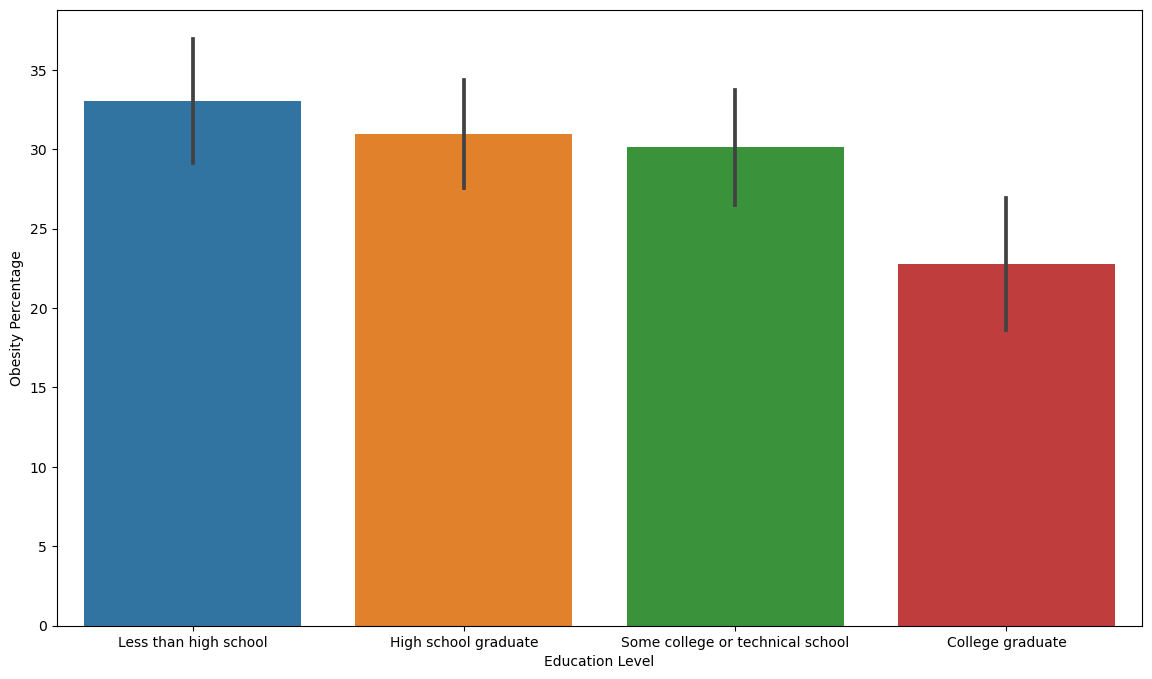

In [178]:
#Obesity Education level
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_ed[df_ed['Question'] == 'Percent of adults aged 18 years and older who have obesity'],x = 'Education', y = 'Data_Value', errorbar = 'sd')
plt.xlabel('Education Level') 
plt.ylabel('Obesity Percentage') 


Text(0, 0.5, 'Obesity Percentage')

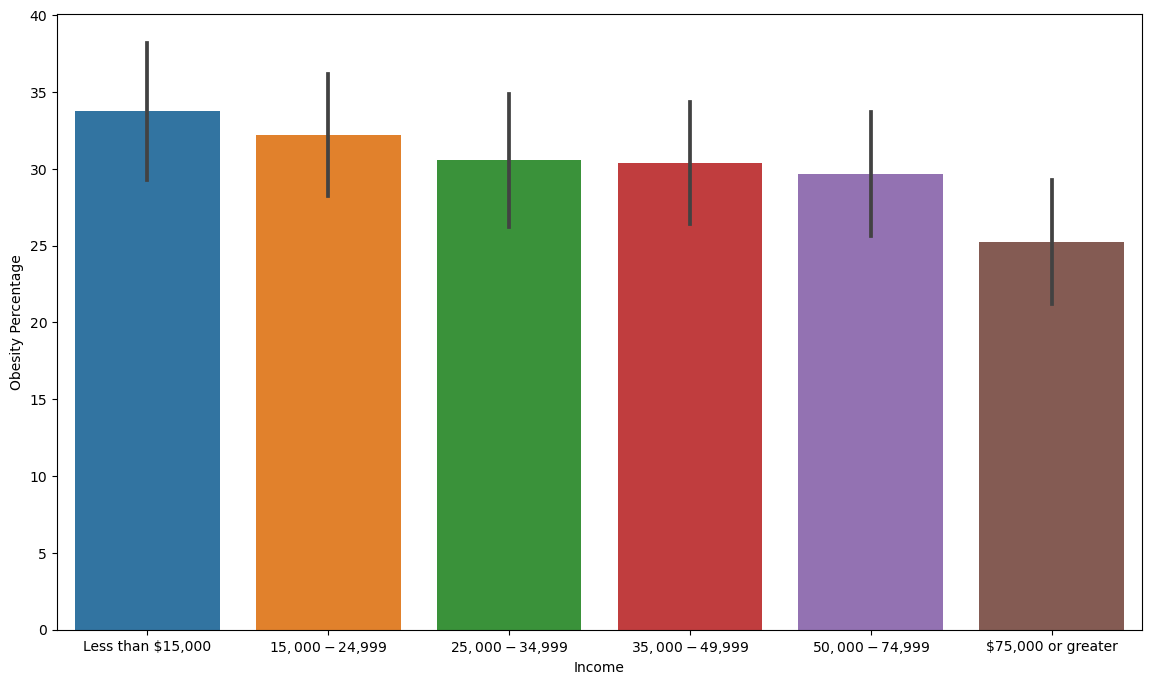

In [179]:
#Obesity Income
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_income[df_income['Question'] == 'Percent of adults aged 18 years and older who have obesity'],x = 'Income', y = 'Data_Value', errorbar= 'sd')
plt.xlabel('Income') 
plt.ylabel('Obesity Percentage') 

Text(0, 0.5, 'Obesity Percentage')

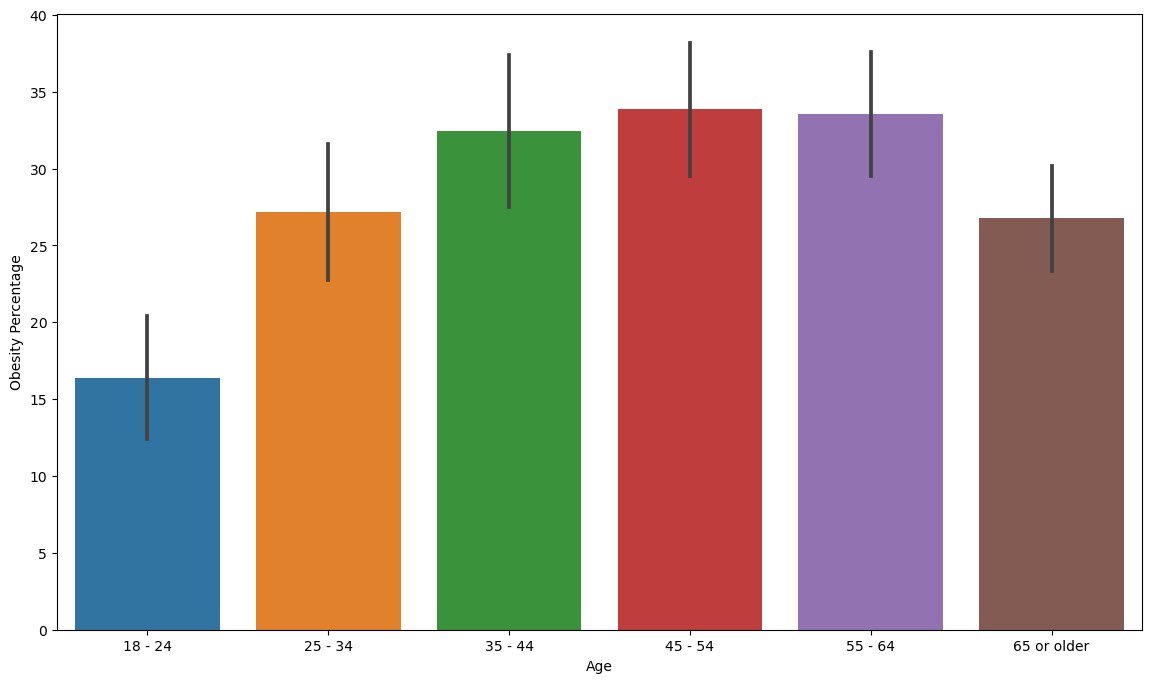

In [180]:
#Obesity Age
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_age[df_age['Question'] == 'Percent of adults aged 18 years and older who have obesity'],x = 'Age(years)', y = 'Data_Value', errorbar= 'sd')
plt.xlabel('Age') 
plt.ylabel('Obesity Percentage') 

Text(0, 0.5, 'Obesity Percentage')

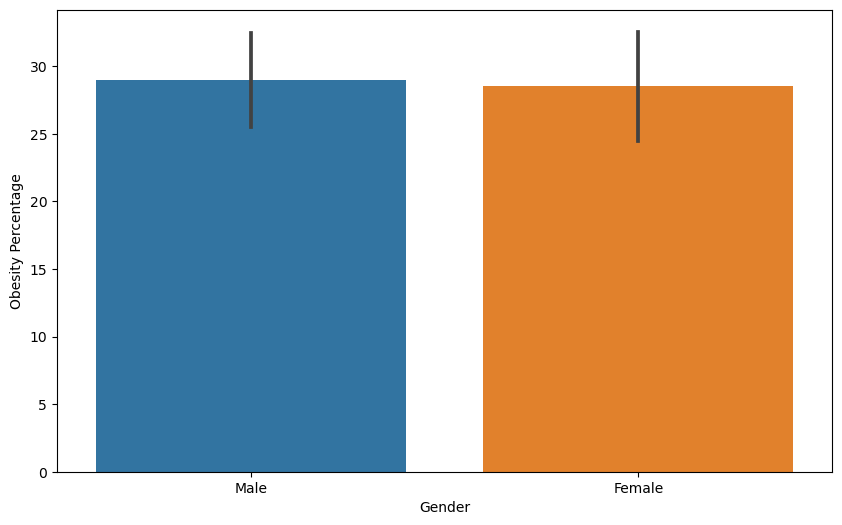

In [181]:
#Obesity Sex
plt.figure(figsize=(10,6)) 
sns.barplot( data = df_sex[df_sex['Question'] == 'Percent of adults aged 18 years and older who have obesity'],x = 'Gender', y = 'Data_Value', errorbar= 'sd')
plt.xlabel('Gender') 
plt.ylabel('Obesity Percentage') 

Text(0, 0.5, 'Obesity Percentage')

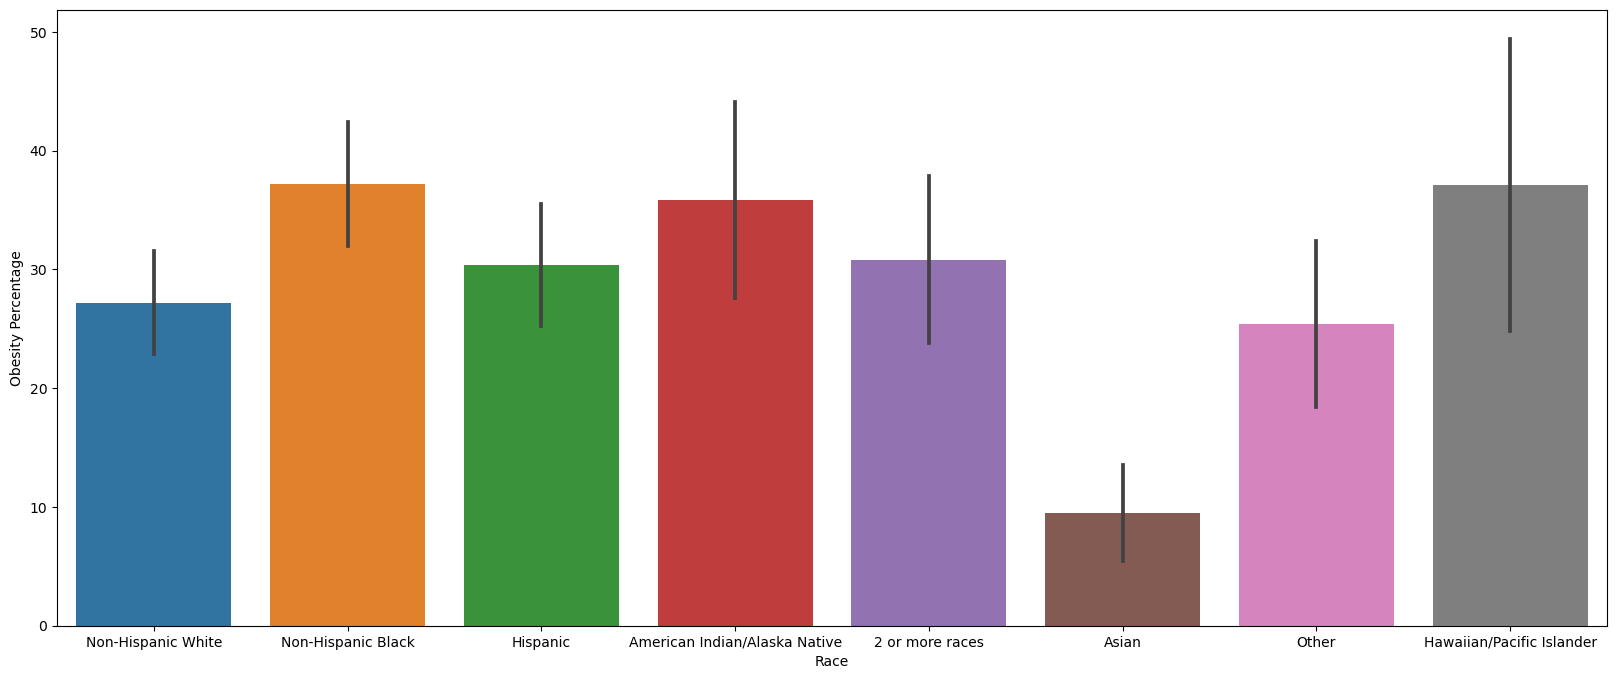

In [182]:
#Obesity Race
plt.figure(figsize=(20,8)) 
sns.barplot( data = df_race[df_race['Question'] == 'Percent of adults aged 18 years and older who have obesity'],x = 'Race/Ethnicity', y = 'Data_Value', errorbar= 'sd')
plt.xlabel('Race') 
plt.ylabel('Obesity Percentage') 

Text(0, 0.5, '150min Pyhsical Activity')

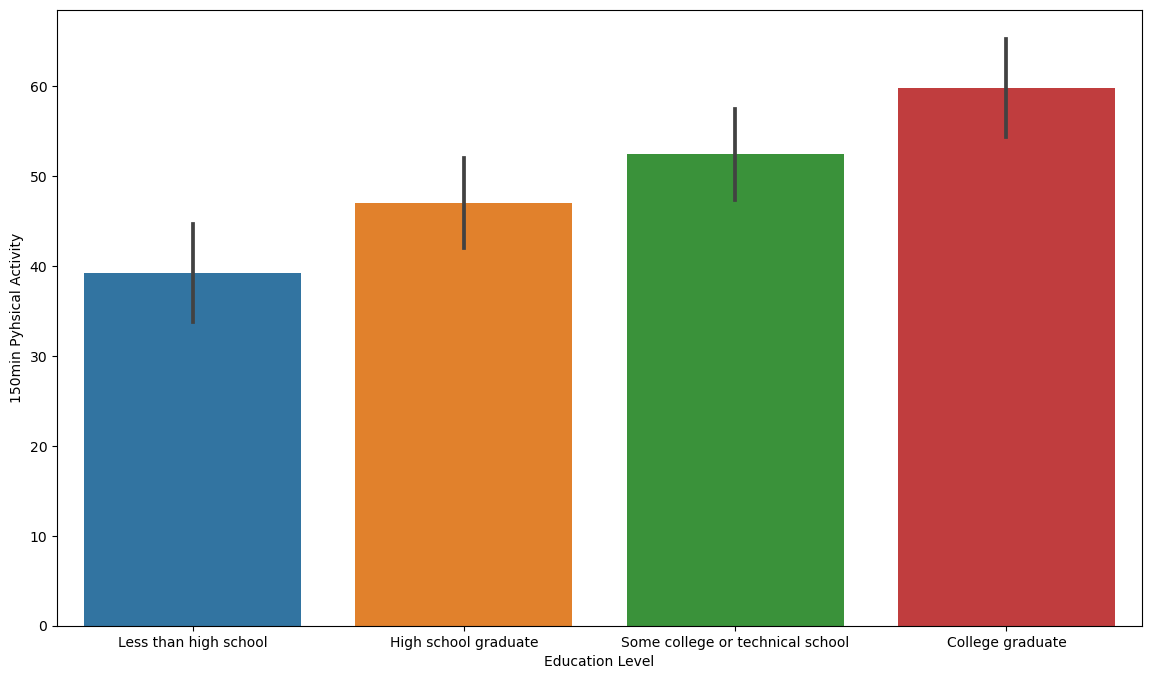

In [183]:
#150min Aerobic Education
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_ed[df_ed['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],x = 'Education', y = 'Data_Value', errorbar = 'sd')
plt.xlabel('Education Level') 
plt.ylabel('150min Pyhsical Activity') 


Text(0, 0.5, '150min Pyhsical Activity')

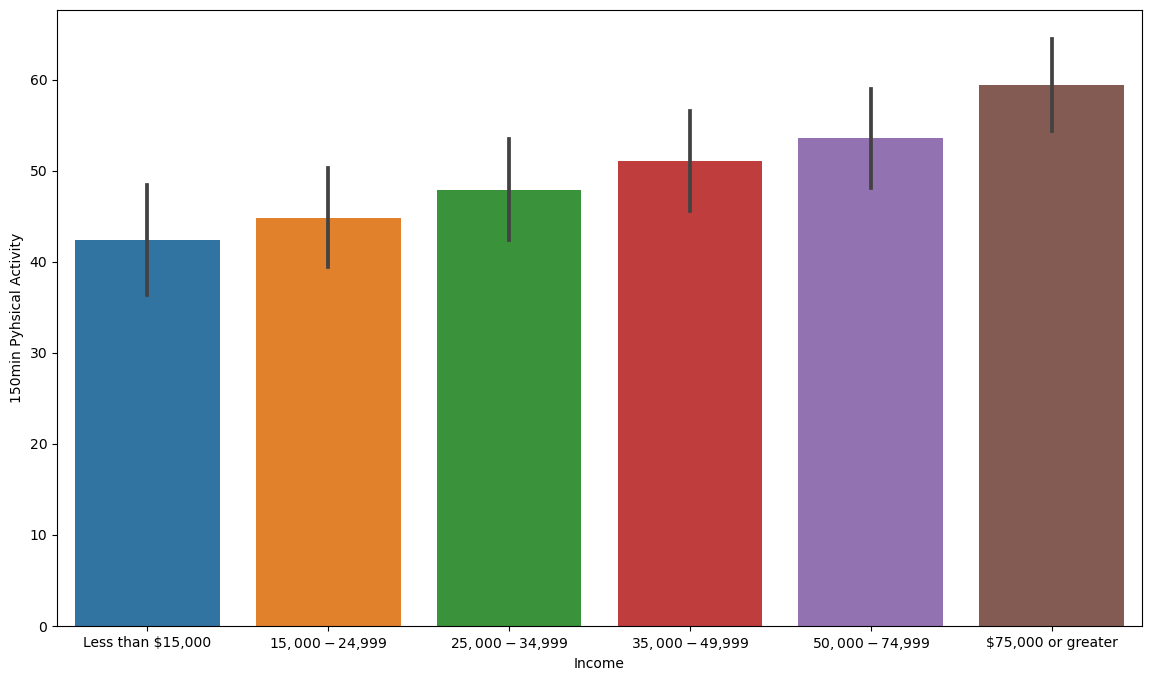

In [184]:
#150min Aerobic Income
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_income[df_income['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],x = 'Income', y = 'Data_Value', errorbar = 'sd')
plt.xlabel('Income') 
plt.ylabel('150min Pyhsical Activity') 

Text(0, 0.5, '150min Pyhsical Activity')

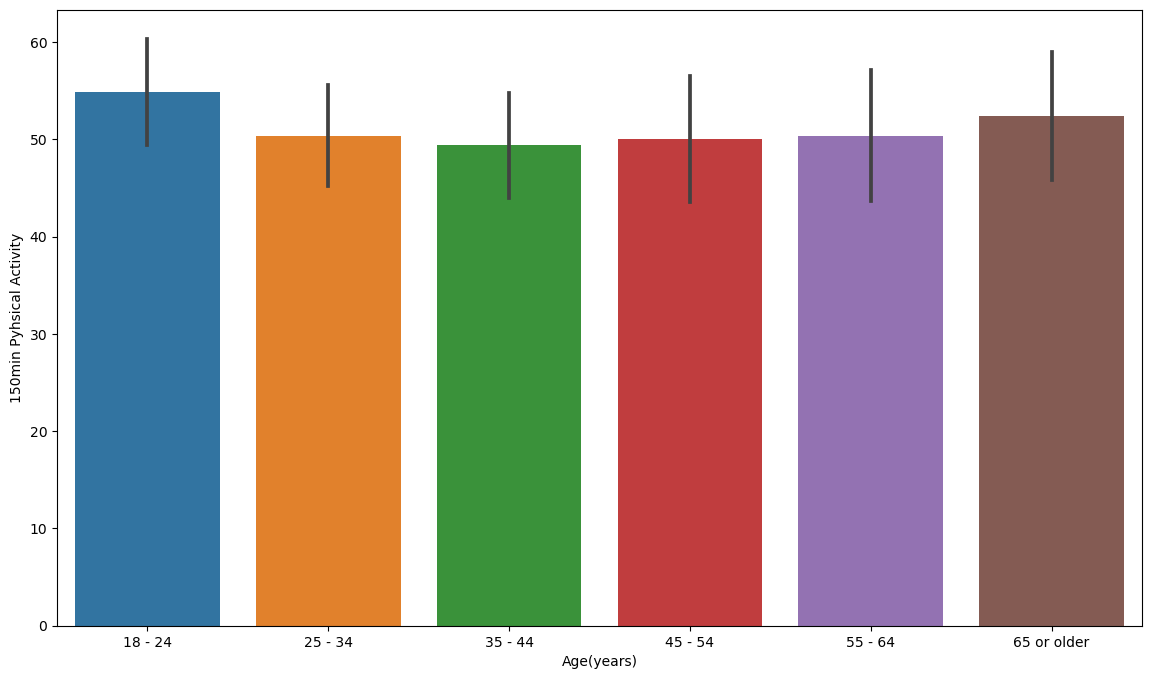

In [185]:
#150min Aerobic Age
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_age[df_age['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],x = 'Age(years)', y = 'Data_Value', errorbar = 'sd')
plt.xlabel('Age(years)') 
plt.ylabel('150min Pyhsical Activity') 

Text(0, 0.5, '150min Pyhsical Activity')

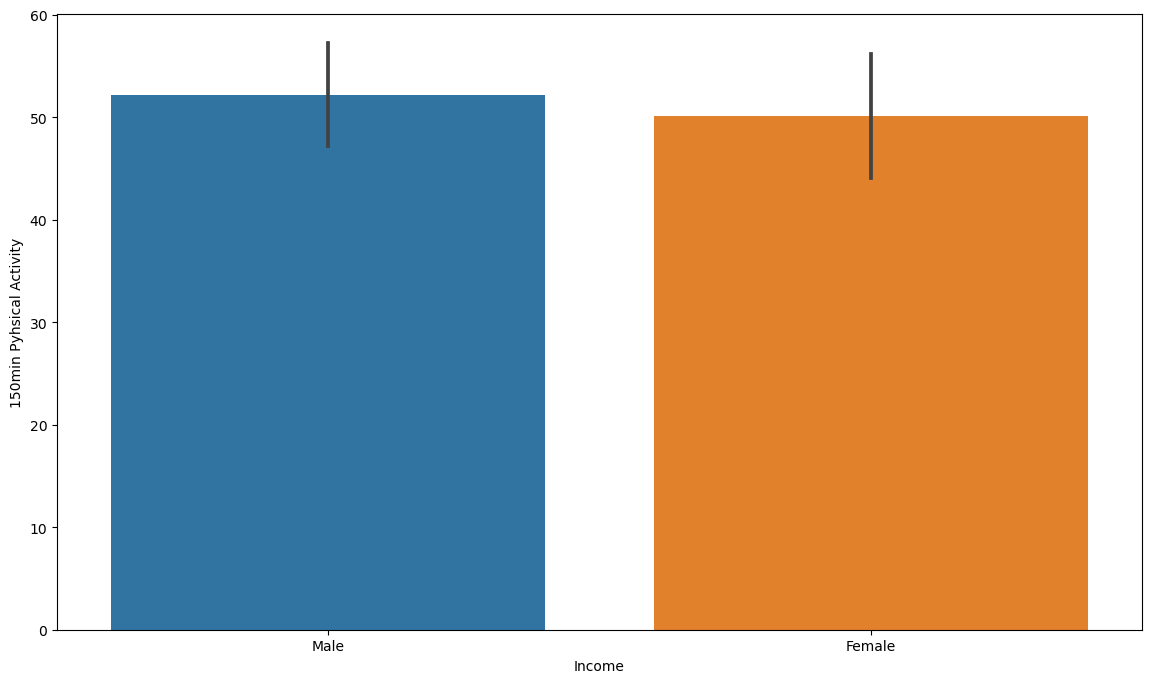

In [186]:
#150min Aerobic Sex
plt.figure(figsize=(14,8)) 
sns.barplot( data = df_sex[df_sex['Question'] == 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)'],x = 'Gender', y = 'Data_Value', errorbar = 'sd')
plt.xlabel('Income') 
plt.ylabel('150min Pyhsical Activity') 

In [187]:
#One Hot encoding data and makind dictionaries for further Analysis

#Questions
df_q = df['Question'].unique() 
questions_dict = {metric: idx for idx, metric in enumerate(df_q)} 
questions_dict_swapped = {v: k for k, v in questions_dict.items()}
questions_hot = pd.get_dummies(df_q, columns= 'Questions', prefix= "", prefix_sep = "")

#Income 
df_in = df['Income'].unique() 
Income_dict = {metric: idx for idx, metric in enumerate(df_q)} 
Income_hot = pd.get_dummies(df_in, columns= 'Income', prefix= "", prefix_sep = "") 

#Age 
df_age = df['Age(years)'].unique() 
age_dict = {metric: idx for idx, metric in enumerate(df_q)} 
age_hot = pd.get_dummies(df_q, columns= 'Age(years)', prefix= "", prefix_sep = "") 

#Education 
df_age = df['Education'].unique() 
Education_dict = {metric: idx for idx, metric in enumerate(df_q)} 
Education_hot = pd.get_dummies(df_q, columns= 'Education', prefix= "", prefix_sep = "")  



In [188]:
questions_dict_swapped

{0: 'Percent of adults aged 18 years and older who have obesity',
 1: 'Percent of adults aged 18 years and older who have an overweight classification',
 2: 'Percent of adults who report consuming fruit less than one time daily',
 3: 'Percent of adults who report consuming vegetables less than one time daily',
 4: 'Percent of adults who engage in muscle-strengthening activities on 2 or more days a week',
 5: 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic activity (or an equivalent combination)',
 6: 'Percent of adults who achieve at least 150 minutes a week of moderate-intensity aerobic physical activity or 75 minutes a week of vigorous-intensity aerobic physical activity and engage in muscle-strengthening activities on 2 or more days a week',
 7: 'Percent of adults who achieve at least 300 minutes a week of moderate-intensity aerobic physical activity or 150 minutes a week of

<Axes: xlabel='YearStart', ylabel='Data_Value'>

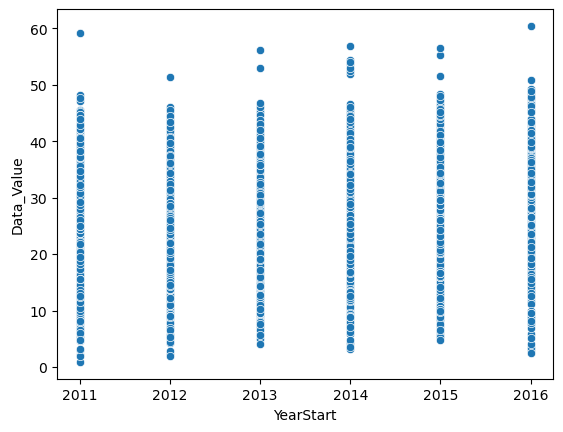

In [189]:
plt.figure() 
sns.scatterplot(data = df_subset[df_subset['Question'] == questions_dict_swapped[0]], x = 'YearStart', y = 'Data_Value')

In [190]:
#Averages per year

obesity_avg_year = df_subset[df_subset['Question'] == questions_dict_swapped[0]].groupby('YearStart').mean(numeric_only = True)

Aerobic_150_avg = df_subset[df_subset['Question'] == questions_dict_swapped[5]].groupby('YearStart').mean(numeric_only = True) 
Aerobic_300_avg = df_subset[df_subset['Question'] == questions_dict_swapped[7]].groupby('YearStart').mean(numeric_only = True)
Aerobic_Strenghth_avg = df_subset[df_subset['Question'] == questions_dict_swapped[6]].groupby('YearStart').mean(numeric_only = True) 
leisure_physical_avg = df_subset[df_subset['Question'] == questions_dict_swapped[8]].groupby('YearStart').mean(numeric_only = True) 

veggies_avg_year = df_subset[df_subset['Question'] == questions_dict_swapped[3]].groupby('YearStart').mean(numeric_only = True) 
fruit_avg_year = df_subset[df_subset['Question'] == questions_dict_swapped[2]].groupby('YearStart').mean(numeric_only = True)  



Text(0, 0.5, 'Obesity Average Percenatge')

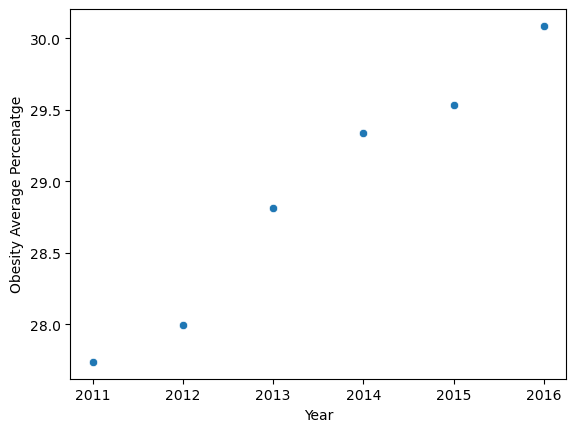

In [191]:
#Obesity vs Year plot 
plt.figure() 
sns.scatterplot(data = obesity_avg_year, x = 'YearStart', y = 'Data_Value') 
plt.xlabel('Year') 
plt.ylabel('Obesity Average Percenatge')

Obesity has had a steady fairly linear increase in these years

Text(0, 0.5, 'Activity Average Percenatge')

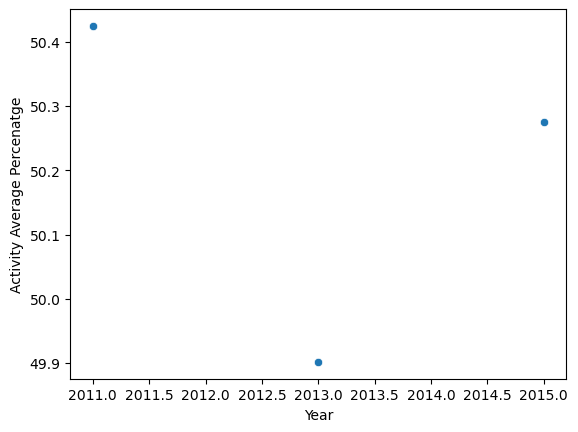

In [192]:
#Activity 150 vs Year plot
plt.figure() 
sns.scatterplot(data = Aerobic_150_avg, x = 'YearStart', y = 'Data_Value') 
plt.xlabel('Year') 
plt.ylabel('Activity Average Percenatge')

Text(0, 0.5, 'Activity Average for 300min Aerobic Percenatge')

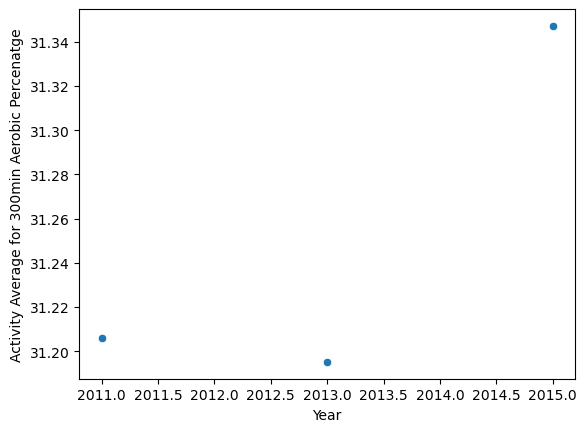

In [193]:
#Activity 300 vs Year plot
plt.figure() 
sns.scatterplot(data = Aerobic_300_avg, x = 'YearStart', y = 'Data_Value') 
plt.xlabel('Year') 
plt.ylabel('Activity Average for 300min Aerobic Percenatge')

Text(0, 0.5, 'Activity Average Aerobic and Strength Percenatge')

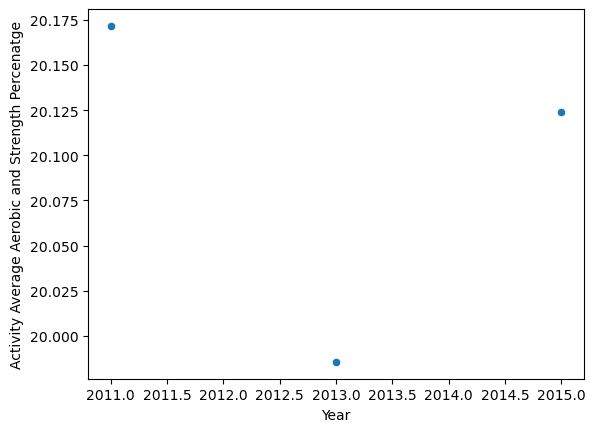

In [194]:
#Activity 150 + strength  vs Year plot
plt.figure() 
sns.scatterplot(data = Aerobic_Strenghth_avg, x = 'YearStart', y = 'Data_Value') 
plt.xlabel('Year') 
plt.ylabel('Activity Average Aerobic and Strength Percenatge')

Text(0, 0.5, 'Leisure time physical activity')

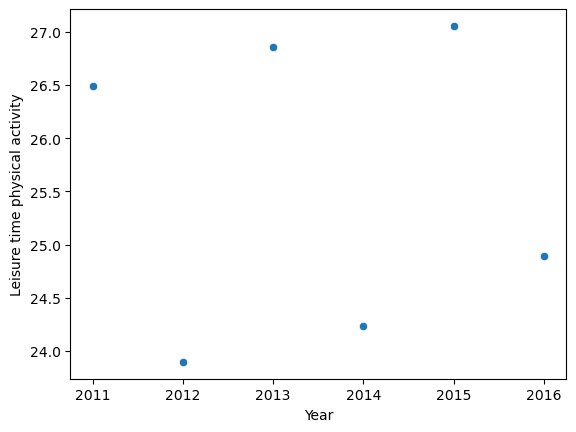

In [195]:
#Leisure time physical activity
plt.figure() 
sns.scatterplot(data = leisure_physical_avg, x = 'YearStart', y = 'Data_Value') 
plt.xlabel('Year') 
plt.ylabel('Leisure time physical activity')

Activity has not changed a notable amount

Text(0, 0.5, 'Veggie consumption')

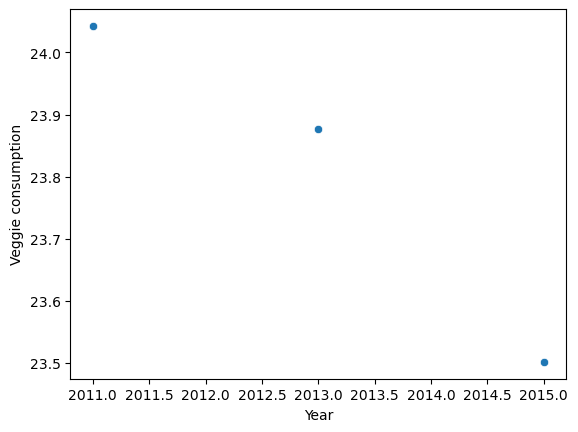

In [196]:
plt.figure() 
sns.scatterplot(data = veggies_avg_year, x = 'YearStart', y = 'Data_Value') 
plt.xlabel('Year') 
plt.ylabel('Veggie consumption')

Text(0, 0.5, 'Fruit consumption')

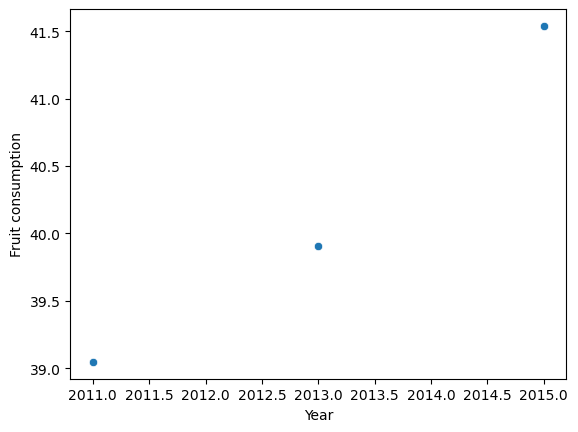

In [197]:
plt.figure() 
sns.scatterplot(data = fruit_avg_year, x = 'YearStart', y = 'Data_Value') 
plt.xlabel('Year') 
plt.ylabel('Fruit consumption')

 Decrease in daily veggie intake and  increase in daily fruit intake 